# AI Project: Employee Attrition Prediction - **source code**

## Table of Contents
- [Framework](#framework)
- [Initial dataset](#initial-dataset)
- [Ethic](#ethic)
- [Data wrangling](#data-wrangling)
- [Model](#model)
  - [Implementation](#implementation)
  - [Quality indicators](#quality-indicators)
  - [Graph and observation](#graph-and-observation)


## Framework

In [173]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
# ...

## Initial dataset

little description of the data set

## Ethic

blabla ethic
What we delete

## Data wrangling

### Data importation

In [174]:
# Load data
general_df = pd.read_csv(os.path.join('data','general_data.csv'))
manager_survey_df = pd.read_csv(os.path.join('data', 'manager_survey_data.csv'))
employee_survey_df = pd.read_csv(os.path.join('data', 'employee_survey_data.csv'))
in_time = pd.read_csv(os.path.join('data', 'in_time.csv'))
out_time = pd.read_csv(os.path.join('data', 'out_time.csv'))

### Data observation

In [175]:
# Check initial data sizes
print(f"General Data: {general_df.shape} (rows, columns)")
print(f"Manager Survey: {manager_survey_df.shape}")
print(f"Employee Survey: {employee_survey_df.shape}")


print("\n===========================================================\n")


# Check if EmployeeID has duplicates
if general_df['EmployeeID'].duplicated().sum() == 0:
    print("EmployeeID is unique")
else:
    print("Warning")


print("\n===========================================================\n")


# Merge data
merge_df = pd.merge(general_df, manager_survey_df, on='EmployeeID', how='left')
final_df = pd.merge(merge_df, employee_survey_df, on='EmployeeID', how='left')

print(f"Size of Final Table: {final_df.shape}")


print("\n===========================================================\n")


print(f"First 5 rows:")
display(final_df.head())

General Data: (4410, 24) (rows, columns)
Manager Survey: (4410, 3)
Employee Survey: (4410, 4)


EmployeeID is unique


Size of Final Table: (4410, 29)


First 5 rows:


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,6,1,0,0,3,3,3.0,4.0,2.0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,6.0,3,5,1,4,2,4,3.0,2.0,4.0
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,5.0,2,5,0,3,3,3,2.0,2.0,1.0
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,13.0,5,8,7,5,2,3,4.0,4.0,3.0
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,9.0,2,6,0,4,3,3,4.0,1.0,3.0


In [176]:
# Check initial data sizes
print(f"In time: {in_time.shape} (rows, columns)")
print(f"Out time: {out_time.shape}")

# Rename first column to 'EmployeeID' for consistency
in_time.rename(columns={in_time.columns[0]: 'EmployeeID'}, inplace=True)
out_time.rename(columns={out_time.columns[0]: 'EmployeeID'}, inplace=True)

# Set 'EmployeeID' as index
in_time.set_index('EmployeeID', inplace=True)
out_time.set_index('EmployeeID', inplace=True)

# Change data into datetime. errors='coerce' if (NaT)
in_time_df = in_time.apply(pd.to_datetime, errors='coerce')
out_time_df = out_time.apply(pd.to_datetime, errors='coerce')

# Calculate working time
working_time = out_time_df - in_time_df
display(working_time.head())


print("\n===========================================================\n")


# Check average working time
average_working_time = working_time.mean(axis=1)
avg_working_hours_numeric = average_working_time.apply(lambda x: x.total_seconds() / 3600)
display(avg_working_hours_numeric.head())


print("\n===========================================================\n")


# Reset index to turn Series into DataFrame
time_features_df = avg_working_hours_numeric.reset_index()
# Rename columns
time_features_df.columns = ['EmployeeID', 'AvgWorkingHours']
# Display final time features DataFrame
display(time_features_df.head())


print("\n===========================================================\n")


# Merge time features back to final_df
final_df = pd.merge(final_df, time_features_df, on='EmployeeID', how='left')
# Check final data sizes
print(f"Final DataFrame: {final_df.shape} (rows, columns)")


print("\n===========================================================\n")


print("First 5 rows of final DataFrame:")
display(final_df.head())

In time: (4410, 262) (rows, columns)
Out time: (4410, 262)


,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,NaT,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,NaT,...,NaT,0 days 07:20:21,0 days 07:23:45,0 days 06:30:17,0 days 07:35:47,NaT,0 days 07:46:26,0 days 07:18:54,0 days 07:46:44,0 days 07:04:49
2,NaT,0 days 08:06:33,0 days 07:27:17,NaT,0 days 07:23:49,0 days 07:25:00,0 days 07:09:03,0 days 07:36:41,0 days 07:16:44,NaT,...,0 days 07:54:11,0 days 07:45:14,0 days 07:42:44,0 days 07:26:08,NaT,NaT,0 days 07:36:53,0 days 07:58:57,0 days 07:59:10,0 days 08:13:38
3,NaT,0 days 06:41:33,0 days 07:15:56,0 days 06:24:19,0 days 06:45:54,0 days 07:20:42,0 days 06:51:41,0 days 07:25:07,0 days 06:59:59,NaT,...,0 days 06:47:09,0 days 07:09:49,0 days 06:48:06,0 days 06:43:49,0 days 06:50:59,NaT,0 days 07:01:26,0 days 07:26:20,0 days 07:32:20,0 days 06:47:11
4,NaT,0 days 07:20:18,0 days 07:17:31,0 days 06:56:35,0 days 06:55:10,0 days 06:51:03,0 days 07:11:35,0 days 06:59:55,0 days 07:18:23,NaT,...,0 days 07:37:45,0 days 06:50:48,0 days 07:19:35,0 days 07:24:49,0 days 07:05:06,NaT,0 days 07:26:50,0 days 07:25:00,0 days 07:21:59,0 days 07:07:59
5,NaT,0 days 08:03:20,0 days 07:59:17,0 days 07:40:57,0 days 07:48:22,0 days 07:39:44,0 days 07:43:18,0 days 08:21:54,0 days 08:15:26,NaT,...,0 days 07:54:13,0 days 07:39:54,0 days 07:57:27,0 days 07:47:13,0 days 08:14:58,NaT,0 days 07:39:44,0 days 08:16:07,0 days 07:57:12,0 days 08:01:05


EmployeeID
1    7.373651
2    7.718969
3    7.013240
4    7.193678
5    8.006175
dtype: float64

,EmployeeID,AvgWorkingHours
0,1,7.373651
1,2,7.718969
2,3,7.013240
3,4,7.193678
4,5,8.006175




Final DataFrame: (4410, 30) (rows, columns)


First 5 rows of final DataFrame:


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,AvgWorkingHours
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,6,1,0,0,3,3,3.0,4.0,2.0,7.373651
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,3,5,1,4,2,4,3.0,2.0,4.0,7.718969
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,2,5,0,3,3,3,2.0,2.0,1.0,7.013240
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,5,8,7,5,2,3,4.0,4.0,3.0,7.193678
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,2,6,0,4,3,3,4.0,1.0,3.0,8.006175


### Data cleaning

In [177]:
# Delete unneeded columns
columns_to_drop = ['EmployeeCount', 'Over18', 'StandardHours']
final_df.drop(columns=columns_to_drop, inplace=True)

# Handle missing values
numeric_columns = final_df.select_dtypes(include=[np.number]).columns
final_df[numeric_columns] = final_df[numeric_columns].fillna(final_df[numeric_columns].mean()) 
missing_values = final_df.isnull().sum()
print(missing_values)


print("\n===========================================================\n")


# Label encoding 
attrition_map = {'Yes': 1, 'No': 0}
final_df['Attrition'] = final_df['Attrition'].map(attrition_map)
gender_map = {'Male': 1, 'Female': 0}
final_df['Gender'] = final_df['Gender'].map(gender_map)
travel_map = {
    'Non-Travel': 0,
    'Travel_Rarely': 1,
    'Travel_Frequently': 2
}
final_df['BusinessTravel'] = final_df['BusinessTravel'].map(travel_map)

# One-hot encoding
categorical_columns = final_df.select_dtypes(include=['object']).columns
final_df = pd.get_dummies(final_df, columns=categorical_columns, drop_first=True)
final_df = final_df.replace({True: 1, False: 0})
print(final_df.info())
print("\n===========================================================\n")
print("First 5 rows after encoding:")
print("\n")
display(final_df.head())

print("\n===========================================================\n")

print(final_df.info())

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
JobInvolvement             0
PerformanceRating          0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
AvgWorkingHours            0
dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 40 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                    

C:\Users\Louis\AppData\Local\Temp\ipykernel_35824\3145521637.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  final_df = final_df.replace({True: 1, False: 0})


,Age,Attrition,BusinessTravel,DistanceFromHome,Education,EmployeeID,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,51,0,1,6,2,1,0,1,131160,1.0,...,0,0,0,0,0,0,0,0,1,0
1,31,1,2,10,1,2,0,1,41890,0.0,...,0,0,0,0,0,1,0,0,0,1
2,32,0,2,17,4,3,1,4,193280,1.0,...,0,0,0,0,0,0,1,0,1,0
3,38,0,0,2,5,4,1,3,83210,3.0,...,1,0,0,0,0,0,0,0,1,0
4,32,0,1,10,1,5,1,1,23420,4.0,...,0,0,0,0,0,0,1,0,0,1




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 40 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                4410 non-null   int64  
 1   Attrition                          4410 non-null   int64  
 2   BusinessTravel                     4410 non-null   int64  
 3   DistanceFromHome                   4410 non-null   int64  
 4   Education                          4410 non-null   int64  
 5   EmployeeID                         4410 non-null   int64  
 6   Gender                             4410 non-null   int64  
 7   JobLevel                           4410 non-null   int64  
 8   MonthlyIncome                      4410 non-null   int64  
 9   NumCompaniesWorked                 4410 non-null   float64
 10  PercentSalaryHike                  4410 non-null   int64  
 11  StockOptionLevel                   4410 non-null   int

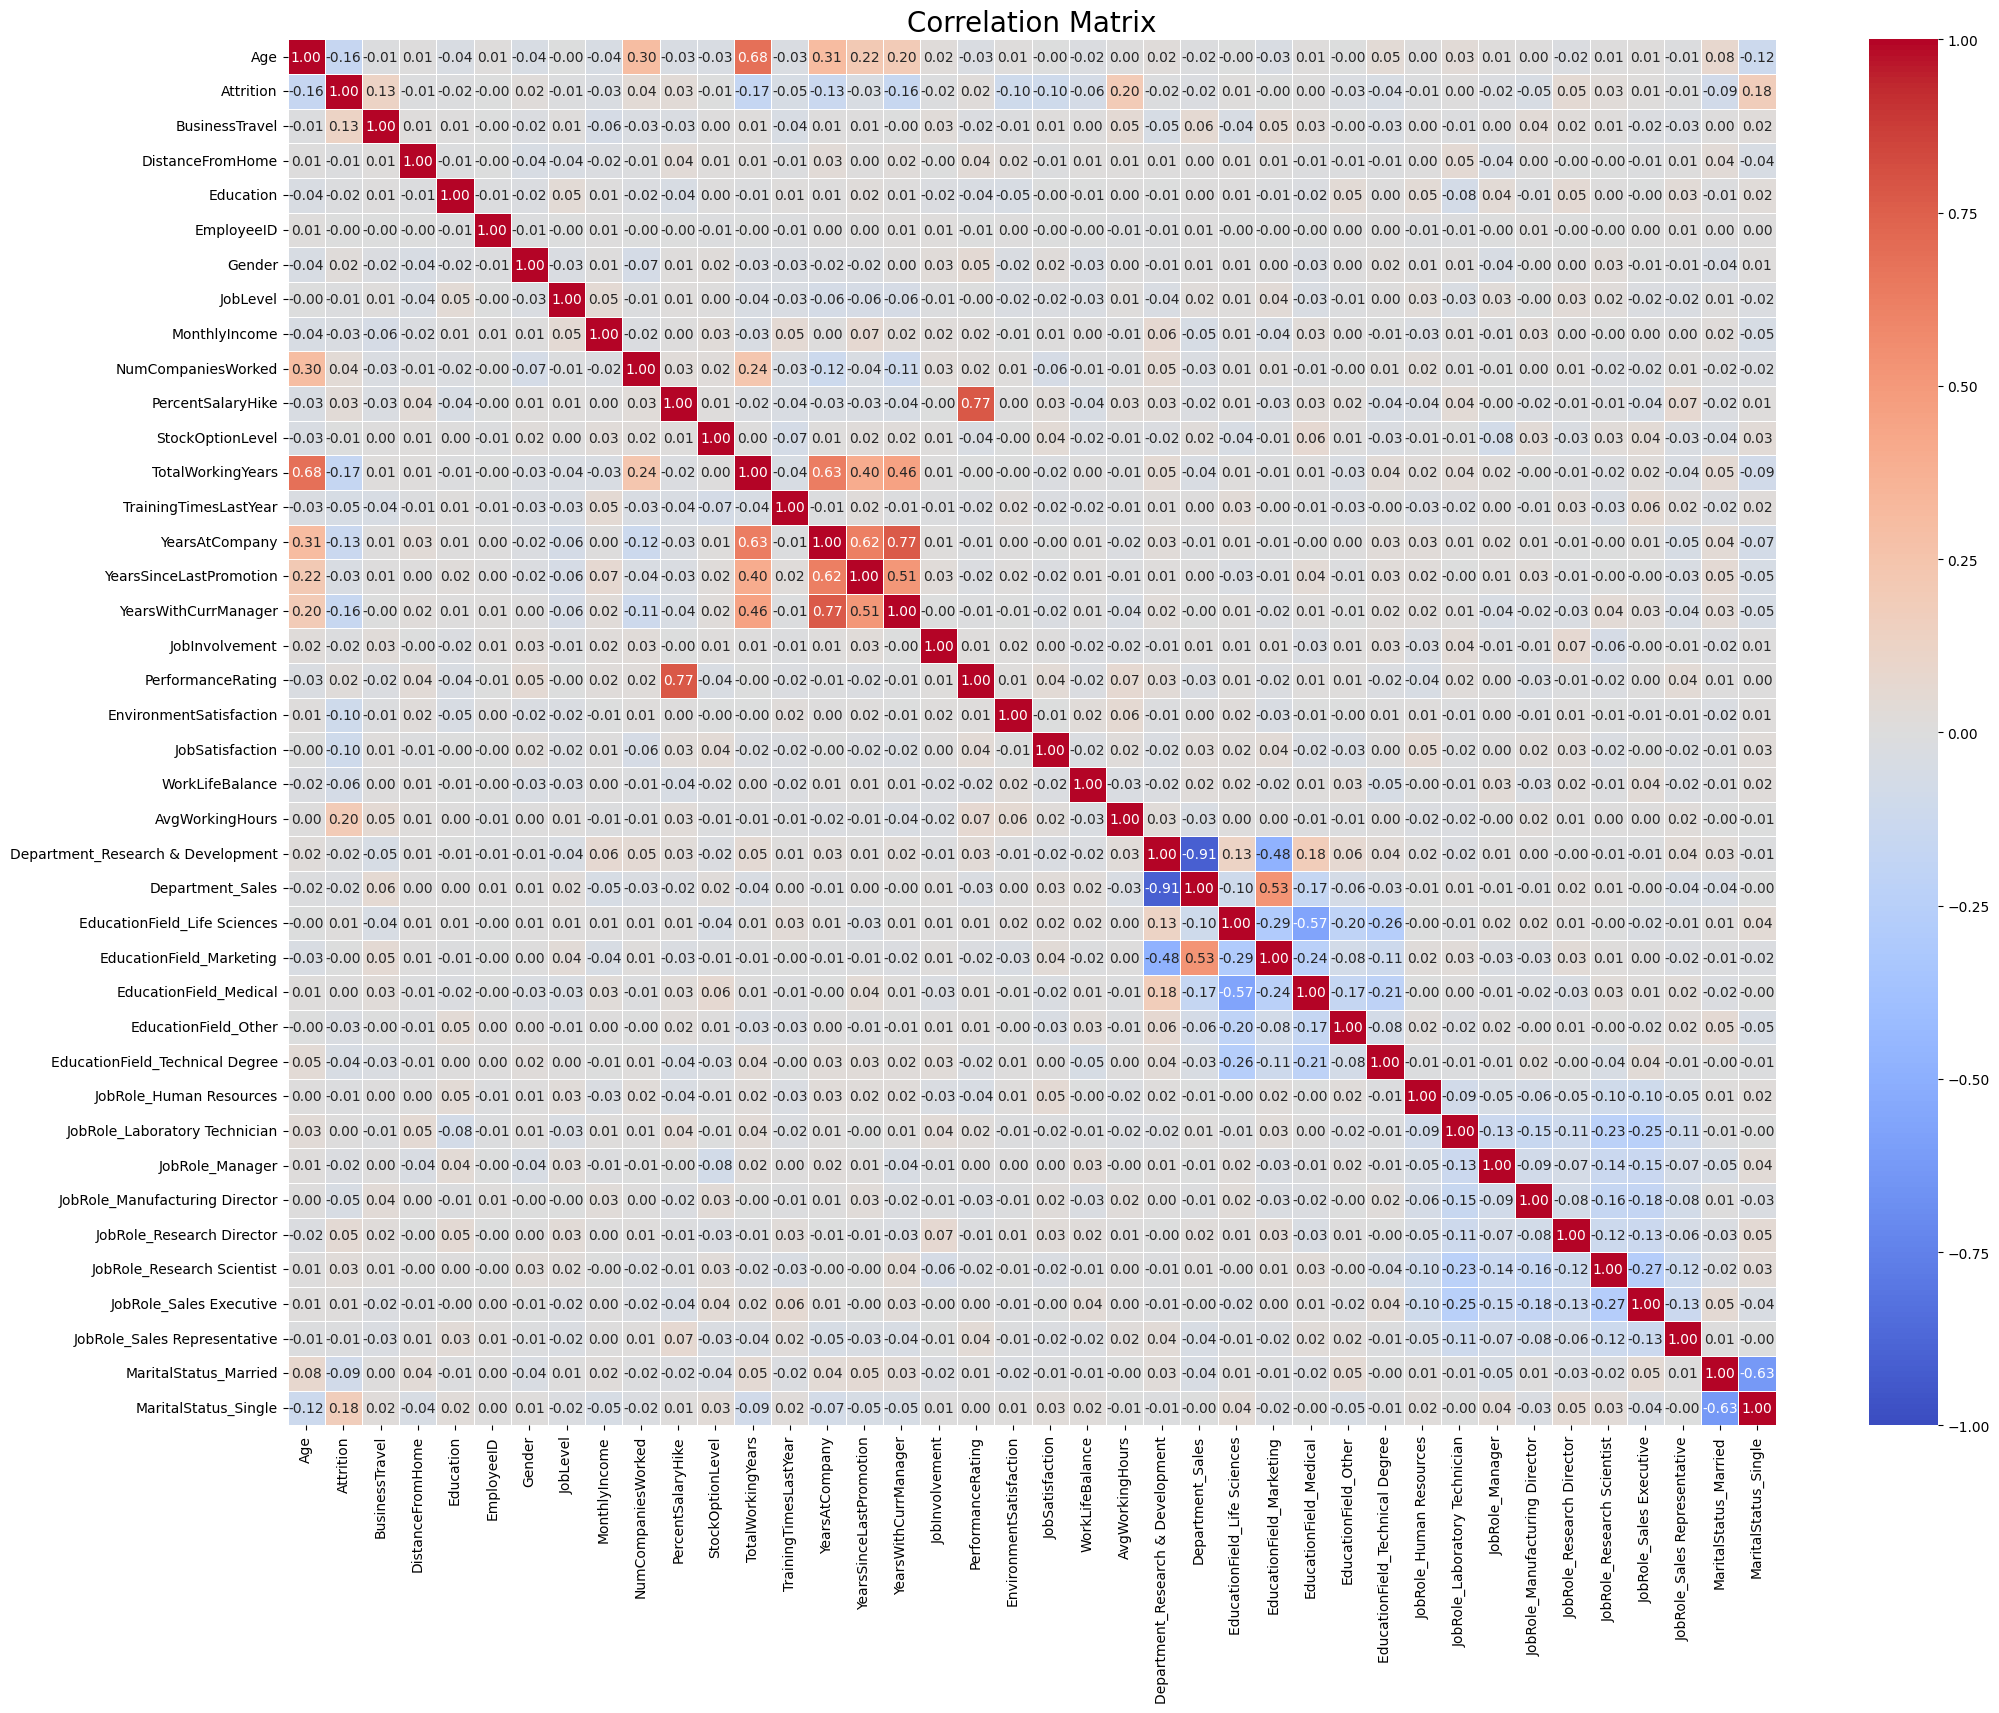

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlation matrix
corr_matrix = final_df.corr()

# Plot heatmap
plt.figure(figsize=(24, 18)) 
sns.heatmap(corr_matrix, 
            annot=True,       
            fmt=".2f",        
            cmap="coolwarm",  
            linewidths=0.5,   
            vmin=-1, vmax=1)  

plt.title("Correlation Matrix", fontsize=20)
plt.show()

In [179]:
final_df.to_csv(os.path.join('data', 'final_data_processed.csv'), index=False)

In [180]:
y = final_df["Attrition"]
X = final_df.drop("Attrition", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## model

### Implementation

In [183]:
models = {
    "logistic_regression": LogisticRegression(),
    "decisionTree_classifier": DecisionTreeClassifier(),
    "randomForest_classifier": RandomForestClassifier(),
    "gaussian_NB": GaussianNB(),
    "svc": SVC(),
    "perceptron": Perceptron()
}

def train_test(X_train, y_train, X_test, model_selected):
    model = models[model_selected]
    model.fit(X_train, y_train)

    return model.predict(X_test)

y_pred = {}

for name, _ in models.items():
    y_pred[name] = train_test(X_train, y_train, X_test, name)

c:\Users\Louis\Etude\Cours\A3\Bloc\4_AI\scripts\env\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Quality indicators

In [184]:
def report(y_test, y_pred, model_selected):
    conf_matrix_log_reg = confusion_matrix(y_test, y_pred)
    print(f"Confusion matrix ({model_selected}):\n", conf_matrix_log_reg)

    class_report_log_reg = classification_report(y_test, y_pred)
    print(f"Classification report ({model_selected}):\n", class_report_log_reg)

for name, result in y_pred.items():
    report(y_test, result, name)

Confusion matrix (logistic_regression):
 [[1113    2]
 [ 203    5]]
Classification report (logistic_regression):
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      1115
           1       0.71      0.02      0.05       208

    accuracy                           0.85      1323
   macro avg       0.78      0.51      0.48      1323
weighted avg       0.83      0.85      0.78      1323

Confusion matrix (decisionTree_classifier):
 [[1090   25]
 [  25  183]]
Classification report (decisionTree_classifier):
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1115
           1       0.88      0.88      0.88       208

    accuracy                           0.96      1323
   macro avg       0.93      0.93      0.93      1323
weighted avg       0.96      0.96      0.96      1323

Confusion matrix (randomForest_classifier):
 [[1112    3]
 [  28  180]]
Classification report (randomForest_cl

c:\Users\Louis\Etude\Cours\A3\Bloc\4_AI\scripts\env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Louis\Etude\Cours\A3\Bloc\4_AI\scripts\env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Louis\Etude\Cours\A3\Bloc\4_AI\scripts\env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mod

### Graph and observation

In [ ]:
# plt if we have